In [1]:
import sys
sys.path.append("..")
from functions import slt_n2
import numpy as np
import matplotlib.pyplot as plt
#import scienceplots
#plt.style.use(['science','ieee'])
#plt.rcParams.update({'font.size': 12})

Single-pass parametric gain:
$$G(L_c)=\frac{|E_s(L)|^2}{|E_s(0)|^2}-1\approx\frac{2\omega_s\omega_id_Q^2I_p}{n_pn_sn_i\epsilon_0c^3}L_c^2Sinc^2(\frac{\Delta kL_c}{2})$$
where,
$$\Delta k=2\pi\left(\frac{n_p}{\lambda_p}-\frac{n_s}{\lambda_s}-\frac{n_i}{\lambda_i}-\frac{m}{\Lambda}\right)$$

Threshold for pulsed SRO:
$$J_T=\frac{1}{T_p}\frac{n_pn_sn_i\epsilon_0c^3}{2\omega_s\omega_id_Q^2}\frac{2.25}{L_c^2}\frac{w_p^2+w_s^2}{w_p^2}\frac{\tau}{(1+\gamma)^2}cosh^{-1}\left(\frac{30L_{cav}}{2\tau c}+a_d-ln(\sqrt{R_s})\right)$$
where, $J_T$ is the threshold pump fluence; $T_p$ is the pump transmission through the input coupler and crystal surface; $L_c$ is the crystal length; $w_p$ and $w_s$ are gaussian mode feild radii of pump and signal; $\tau$ is the $1/e^2$ pump-pulse duration; $\gamma$ is the ratio of backward to forward pump-field amplitude (~0.6); $L_{cav}$ is the cavity optical length; $a_d=0$ is the single pass power loss at the signal not including the output coupler; $R_s$ is the signal reflectivity of the OC.  


In [2]:
def th_pump(om_s, om_i, n_p,n_s,n_i, d_Q, L_c, w_p, w_s, tau, L_cav, R_s, a_d = 0, gamma = 0.6, T_p = 1):
    """Threshold pump fluence for pulsed SRO.    
    Parameters
    ----------
    om_s : float
        Signal angular frequency in rad/s.
    om_i : float
        Idler angular frequency in rad/s.
    n_p : float
        Refractive index of pump.
    n_s : float
        Refractive index of signal.
    n_i : float
        Refractive index of idler.
    d_Q : float
        Effective nonlinear coefficient in m/V.
    L_c : float
        Crystal length in meters.
    w_p : float
        Pump beam waist in meters.
    w_s : float
        Signal beam waist in meters.
    tau : float
        Pump pulse duration (1/e^2) in seconds.
    L_cav : float
        Cavity optical length in meters.
    R_s : float
        Signal output coupler reflectivity (0 to 1).
    a_d : float, optional
        Single pass power loss at the signal not including the output coupler, by default 0.
    gamma : float, optional
        Ratio of backward to forward pump-field amplitude, by default 0.6.
    T_p : float, optional
        Pump transmission through the input coupler and crystal surface, by default 1.
    Returns
    -------
    float
        Threshold pump fluence in J/m^2?.
    """
    return n_p*n_s*n_i*8.854e-12*3e8**3*2.25*(w_p**2+w_s**2)*tau*np.acosh(30*L_cav/(2*tau*3e8)+a_d-np.log(np.sqrt(R_s)))/(2*om_s*om_i*d_Q**2*L_c**2*w_p**2*(1+gamma)**2*T_p)

In [3]:
def sp_gain(L, om_s, om_i, dQ, I_p, n_p, n_s, n_i, delta_k):
    """Calculate the single-pass gain for an OPO.
    Args:
        L (float): Length of the nonlinear crystal (m).
        om_s (float): Angular frequency of the signal wave (rad/s).
        om_i (float): Angular frequency of the idler wave (rad/s).
        dQ (float): Effective nonlinear coefficient (m/V).
        I_p (float): Pump intensity (W/m^2).
        n_p (float): Refractive index of the pump wave.
        n_s (float): Refractive index of the signal wave.
        n_i (float): Refractive index of the idler wave.
        delta_k (float): Phase mismatch (1/m).
    Returns:
        float: Single-pass gain.
    """
    ep_0 = 8.854e-12  # Vacuum permittivity in F/m
    c = 3e8  # Speed of light in m/s
    return 2*om_s*om_i*dQ*I_p/n_p/n_s/n_i/c**2/ep_0*L**2*np.sinc(delta_k*L/2)**2

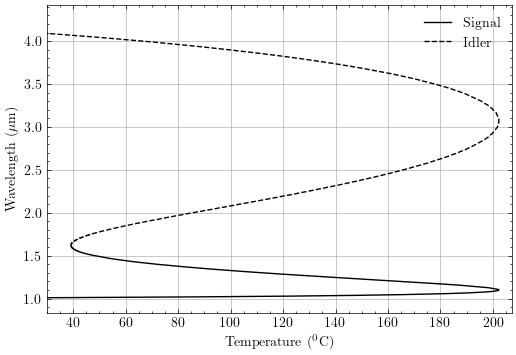

In [18]:
wl_p = 0.810 # pump wavelength in micrometers
wl_s = np.linspace(1.0,2*wl_p,500) # signal wavelength in micrometers
wl_i = 1/(1/wl_p - 1/wl_s) # idler wavelength in micrometers
grat_period = 23 # in micrometers

T_arr = []
for i in range(len(wl_s)):
    T = np.linspace(25,250,1000) # temperature in Celsius
    n_p = np.sqrt(slt_n2(wl_p, T))
    n_s = np.sqrt(slt_n2(wl_s[i], T))
    n_i = np.sqrt(slt_n2(wl_i[i], T))
    delta_k = 2*np.pi*(n_p/wl_p - n_s/wl_s[i] - n_i/wl_i[i] - 1/grat_period)/1e-6
    t_at_zero = T[np.argmin(np.abs(delta_k))]
    T_arr.append(t_at_zero)

plt.figure(figsize=(6,4))
plt.plot(T_arr,wl_s,'-k', label='Signal')
plt.plot(T_arr,wl_i,'--k' , label='Idler')
#plt.title('Quasi-phase-matching Grating Period vs Signal/Idler Wavelengths at T={}°C'.format(T))
plt.xlabel(r'Temperature ($^0$C)')
plt.ylabel(r'Wavelength ($\mu$m)')
plt.xlim([np.min(T_arr)+5, np.max(T_arr)+5])
plt.legend()
plt.grid()
plt.show()

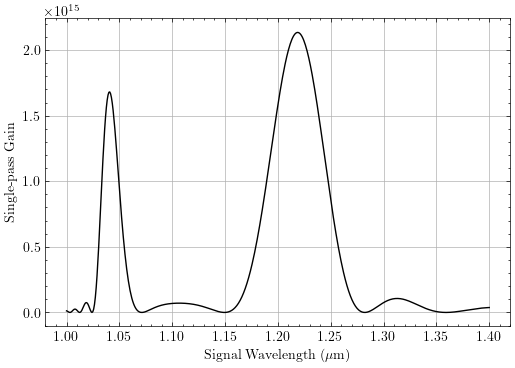

In [26]:
T = 155 # temperature in Celsius
L = 1e-3 # length of the crystal in meters
wl_p = 0.810 # pump wavelength in micrometers
wl_s = np.linspace(1.0,1.4,500) # signal wavelength in micrometers
wl_i = 1/(1/wl_p - 1/wl_s) # idler wavelength in micrometers
grat_period = 23 # in micrometers
I_p = 1e9 # pump intensity in W/m^2
dQ = 6.75e-12 # effective nonlinear coefficient in m/V
gain_arr = []
delta_k_arr = []
for i in range(len(wl_s)):
    n_p = np.sqrt(slt_n2(wl_p, T))
    n_s = np.sqrt(slt_n2(wl_s[i], T))
    n_i = np.sqrt(slt_n2(wl_i[i], T))
    om_s = 2*np.pi*3e8/(wl_s[i]*1e-6)
    om_i = 2*np.pi*3e8/(wl_i[i]*1e-6)
    delta_k = 2*np.pi*(n_p/wl_p - n_s/wl_s[i] - n_i/wl_i[i] - 1/grat_period)/1e-6
    gain = sp_gain(L, om_s, om_i, dQ, I_p, n_p, n_s, n_i, delta_k)
    gain_arr.append(gain)
    delta_k_arr.append(delta_k)
    
plt.figure(figsize=(6,4))
plt.plot(wl_s, gain_arr, '-k')
plt.xlabel(r'Signal Wavelength ($\mu$m)')
plt.ylabel('Single-pass Gain')
plt.grid()
plt.show()

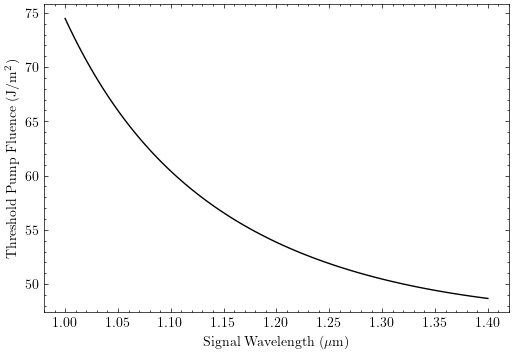

In [6]:
wl_p = 0.810 # pump wavelength in micrometers
wl_s = np.linspace(1,1.4,100) # idler wavelength in micrometers
wl_i = 1/(1/wl_p - 1/wl_s) # idler wavelength in micrometers
T = 155 # temperature in Celsius
n_p = np.sqrt(slt_n2(wl_p, T))
n_s = np.sqrt(slt_n2(wl_s, T))
n_i = np.sqrt(slt_n2(wl_i, T))
d_Q = 6.75e-12 # effective nonlinear coefficient in m/V
L_c = 1e-3 # crystal length in meters
L_cav = 1.97 # cavity optical length in meters
om_s = 2*np.pi*3e8/(wl_s*1e-6)
om_i = 2*np.pi*3e8/(wl_i*1e-6)
w_p = 20e-6 # pump beam waist in meters
w_s = 20e-6 # signal beam waist in meters
tau = 100e-15 # pump pulse duration (1/e^2) in seconds
R_s = 0.9 # signal output coupler reflectivity
a_d = 0.01 # single pass power loss at the signal not including the output coupler


th_val = th_pump(om_s, om_i, n_p,n_s,n_i, d_Q, L_c, w_p, w_s, tau, L_cav, R_s, a_d)

plt.figure(figsize=(6,4))
plt.plot(wl_s, th_val, '-k')
plt.xlabel(r'Signal Wavelength ($\mu$m)')
plt.ylabel('Threshold Pump Fluence (J/m$^2$)')
plt.show()

In [7]:
P_avg_p = 1 # Pump power in Watts
rep_rate = 76e6 # repetition rate in Hz
P_peak_p = P_avg_p / (rep_rate * tau) # Peak pump power in Watts
I_p = 2*P_avg_p/(np.pi*w_p**2) # Pump intensity in W/m^2
E_p = P_avg_p / rep_rate # Pump energy in Joules
print ("Pump intensity: {:.2e} W/m^2".format(I_p))
print ("Pump energy: {:.2f} nJ".format(E_p*1e9))
print ("Peak power: {:.2f} W".format(P_peak_p))

Pump intensity: 1.59e+09 W/m^2
Pump energy: 13.16 nJ
Peak power: 131578.95 W
